In [3]:
import pandas as pd
file_path = '/content/ev-charging-stations-india.csv'
df = pd.read_csv(file_path)

# Display the first few rows and basic info
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1547 non-null   object 
 1   state      1547 non-null   object 
 2   city       1547 non-null   object 
 3   address    1507 non-null   object 
 4   lattitude  1541 non-null   object 
 5   longitude  1541 non-null   float64
 6   type       1539 non-null   float64
dtypes: float64(2), object(5)
memory usage: 84.7+ KB


(                                                name          state      city  \
 0                 Neelkanth Star DC Charging Station        Haryana  Gurugram   
 1                       Galleria DC Charging Station        Haryana  Gurugram   
 2  Highway Xpress (Jaipur-Delhi) DC charging station      Rajasthan    Behror   
 3                  Food Carnival DC Charging Station  Uttar Pradesh  Khatauli   
 4                  Food Carnival AC Charging Station  Uttar Pradesh  Khatauli   
 
                                              address lattitude  longitude  \
 0  Neelkanth Star Karnal, NH 44, Gharunda, Kutail...   29.6019    76.9803   
 1  DLF Phase IV, Sector 28, Gurugram, Haryana 122022   28.4673    77.0818   
 2  Jaipur to Delhi Road, Behror Midway, Behror, R...   27.8751    76.2760   
 3  Fun and Food Carnival, NH 58, Khatauli Bypass,...   29.3105    77.7218   
 4  NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...   29.3105    77.7218   
 
    type  
 0  12.0  
 1  12.0  
 2 

Starting the EV Charging Station Analysis...
Loading the dataset...
Dataset loaded successfully.
Showing the first few rows and basic info about the raw data:
                                                name          state      city  \
0                 Neelkanth Star DC Charging Station        Haryana  Gurugram   
1                       Galleria DC Charging Station        Haryana  Gurugram   
2  Highway Xpress (Jaipur-Delhi) DC charging station      Rajasthan    Behror   
3                  Food Carnival DC Charging Station  Uttar Pradesh  Khatauli   
4                  Food Carnival AC Charging Station  Uttar Pradesh  Khatauli   

                                             address lattitude  longitude  \
0  Neelkanth Star Karnal, NH 44, Gharunda, Kutail...   29.6019    76.9803   
1  DLF Phase IV, Sector 28, Gurugram, Haryana 122022   28.4673    77.0818   
2  Jaipur to Delhi Road, Behror Midway, Behror, R...   27.8751    76.2760   
3  Fun and Food Carnival, NH 58, Khatauli Bypa

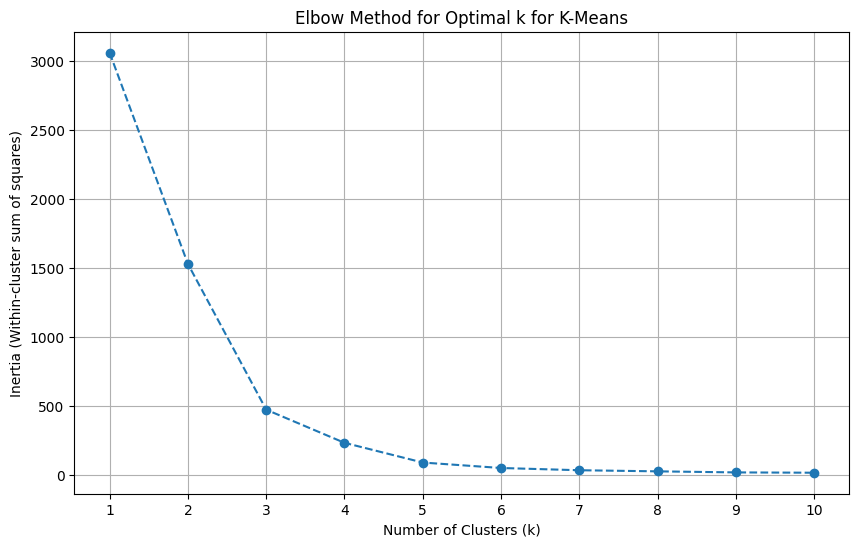


Based on the Elbow method (or a chosen value), we will proceed with k=5 clusters for K-Means.
K-Means clustering has been performed, and cluster labels are added to the data.

--- DBSCAN Clustering ---
Applying DBSCAN clustering algorithm to identify density-based clusters and outliers...
DBSCAN clustering has been performed. Cluster -1 indicates outliers.

--- Analyzing K-Means Cluster Characteristics ---

Number of charging stations in each K-Means cluster:
kmeans_cluster
0    555
1      2
2    458
3    513
4      3
Name: count, dtype: int64

Top 3 most common states within each K-Means cluster:

For K-Means Cluster 0:
state
Maharashtra    204
Gujarat         66
Telangana       60
Name: count, dtype: int64

For K-Means Cluster 1:
state
Bihar    2
Name: count, dtype: int64

For K-Means Cluster 2:
state
Delhi            109
Uttar Pradesh     76
Rajasthan         55
Name: count, dtype: int64

For K-Means Cluster 3:
state
Tamil Nadu    142
Karnataka     123
Kerala         77
Name: count

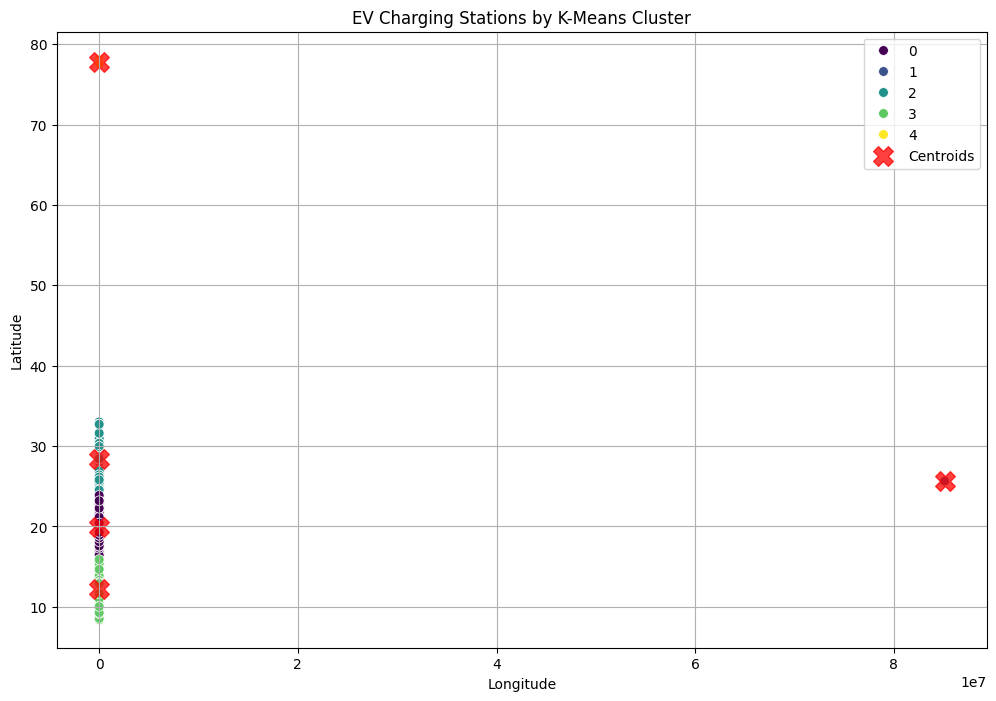


Next, generating a scatter plot for DBSCAN clusters. Outliers (if any) will be shown in black.
Displaying the DBSCAN cluster map.


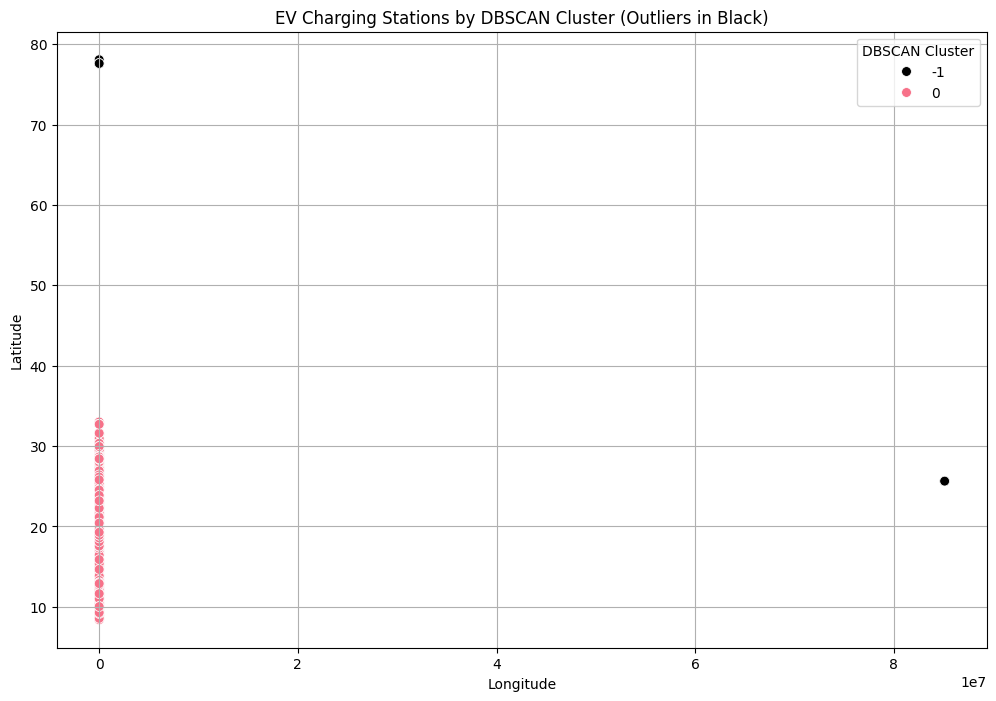


Visualizing the number of stations in each K-Means cluster using a bar chart...
Displaying bar chart for K-Means cluster sizes.


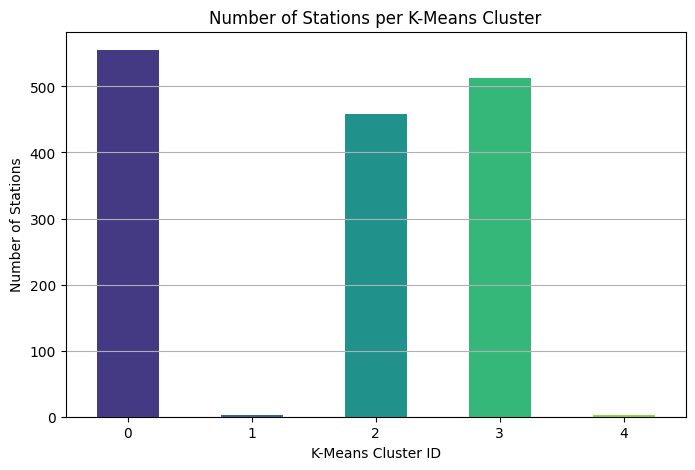


Visualizing the number of stations in each DBSCAN cluster (including outliers) using a bar chart...
Displaying bar chart for DBSCAN cluster sizes.


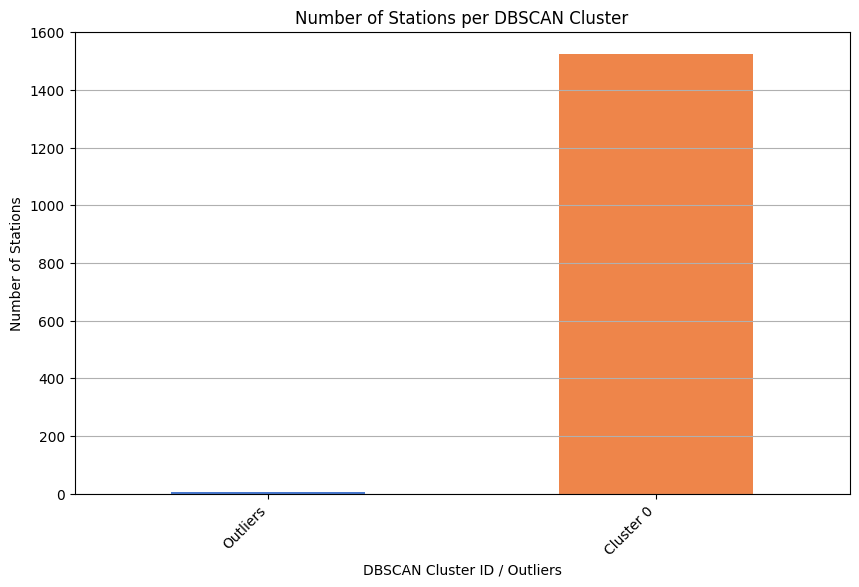


Analyzing and visualizing the distribution of station 'type' within K-Means clusters...
Displaying bar chart of station types per K-Means cluster.


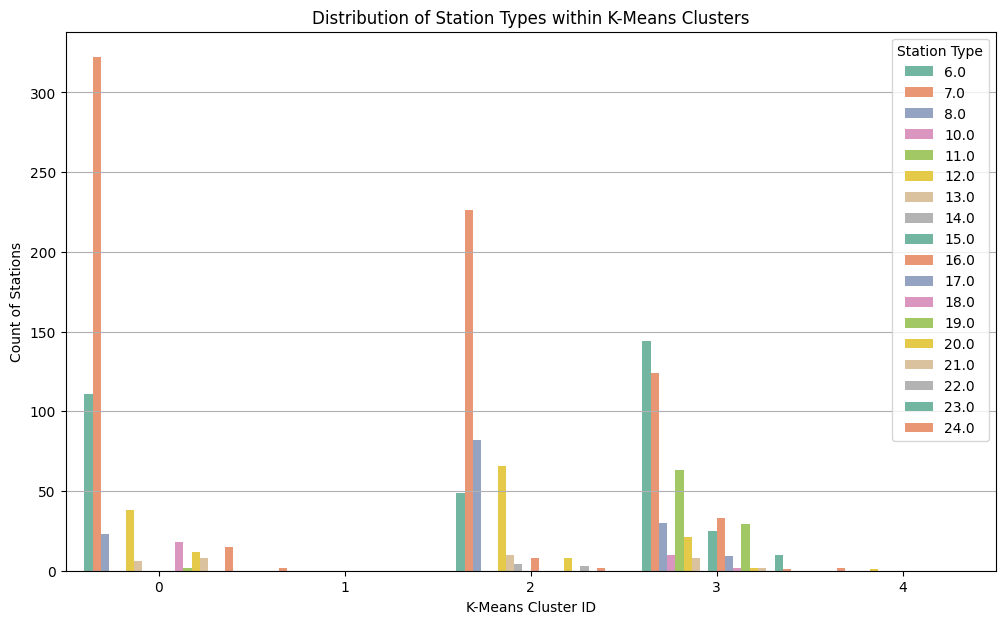


--- Station Type Distribution within K-Means Clusters (Percentage View) ---

For K-Means Cluster 0:
type
7.0     58.02
6.0     20.00
12.0     6.85
8.0      4.14
18.0     3.24
24.0     2.70
20.0     2.16
21.0     1.44
13.0     1.08
19.0     0.36
Name: proportion, dtype: float64

For K-Means Cluster 1:
type
7.0    100.0
Name: proportion, dtype: float64

For K-Means Cluster 2:
type
7.0     49.34
8.0     17.90
12.0    14.41
6.0     10.70
13.0     2.18
16.0     1.75
20.0     1.75
14.0     0.87
22.0     0.66
24.0     0.44
Name: proportion, dtype: float64

For K-Means Cluster 3:
type
6.0     28.07
7.0     24.17
11.0    12.28
16.0     6.43
8.0      5.85
19.0     5.65
15.0     4.87
12.0     4.09
10.0     1.95
23.0     1.95
17.0     1.75
13.0     1.56
20.0     0.39
21.0     0.39
18.0     0.39
24.0     0.19
Name: proportion, dtype: float64

For K-Means Cluster 4:
type
7.0     66.67
12.0    33.33
Name: proportion, dtype: float64

--- Final Look: Sample Data with Cluster Labels ---
Displaying the 

In [5]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Starting the EV Charging Station Analysis...")

print("Loading the dataset...")
file_path = '/content/ev-charging-stations-india.csv'
data_frame = pd.read_csv(file_path)
print("Dataset loaded successfully.")
print("Showing the first few rows and basic info about the raw data:")
print(data_frame.head())
data_frame.info()

print("\nCleaning and preparing the data for analysis...")
cleaned_data = data_frame.dropna(subset=['lattitude', 'longitude', 'state', 'city', 'type'])
cleaned_data.loc[:, 'lattitude'] = pd.to_numeric(cleaned_data['lattitude'], errors='coerce')
cleaned_data = cleaned_data.dropna(subset=['lattitude'])
print("Data cleaning complete. Rows with missing essential information have been removed.")

print("\nExtracting and standardizing geographical coordinates for clustering...")
coordinates = cleaned_data[['lattitude', 'longitude']].to_numpy()
scaler = StandardScaler()
scaled_coordinates = scaler.fit_transform(coordinates)
print("Coordinates have been extracted and standardized.")

print("\n--- K-Means Clustering ---")
print("Determining a suitable number of clusters (k) using the Elbow Method...")
inertia_values = []
k_range_for_elbow = range(1, 11)
for k_val in k_range_for_elbow:
    kmeans_test_model = KMeans(n_clusters=k_val, random_state=42, n_init='auto')
    kmeans_test_model.fit(scaled_coordinates)
    inertia_values.append(kmeans_test_model.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range_for_elbow, inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k for K-Means')
plt.xticks(k_range_for_elbow)
plt.grid(True)
print("Displaying the Elbow Method plot. Observe this plot to identify an 'elbow' point, which suggests an optimal k.")
plt.show()

chosen_k_for_kmeans = 5
print(f"\nBased on the Elbow method (or a chosen value), we will proceed with k={chosen_k_for_kmeans} clusters for K-Means.")
kmeans_model = KMeans(n_clusters=chosen_k_for_kmeans, random_state=42, n_init='auto')
cleaned_data['kmeans_cluster'] = kmeans_model.fit_predict(scaled_coordinates)
print("K-Means clustering has been performed, and cluster labels are added to the data.")

print("\n--- DBSCAN Clustering ---")
print("Applying DBSCAN clustering algorithm to identify density-based clusters and outliers...")
dbscan_model = DBSCAN(eps=0.5, min_samples=10)
cleaned_data['dbscan_cluster'] = dbscan_model.fit_predict(scaled_coordinates)
print("DBSCAN clustering has been performed. Cluster -1 indicates outliers.")

print("\n--- Analyzing K-Means Cluster Characteristics ---")
kmeans_cluster_station_counts = cleaned_data['kmeans_cluster'].value_counts().sort_index()
print("\nNumber of charging stations in each K-Means cluster:")
print(kmeans_cluster_station_counts)

print("\nTop 3 most common states within each K-Means cluster:")
for cluster_id_kmeans in sorted(cleaned_data['kmeans_cluster'].unique()):
    print(f"\nFor K-Means Cluster {cluster_id_kmeans}:")
    states_in_this_cluster = cleaned_data[cleaned_data['kmeans_cluster'] == cluster_id_kmeans]['state'].value_counts()
    print(states_in_this_cluster.head(3))

print("\nTop 3 most common cities within each K-Means cluster:")
for cluster_id_kmeans in sorted(cleaned_data['kmeans_cluster'].unique()):
    print(f"\nFor K-Means Cluster {cluster_id_kmeans}:")
    cities_in_this_cluster = cleaned_data[cleaned_data['kmeans_cluster'] == cluster_id_kmeans]['city'].value_counts()
    print(cities_in_this_cluster.head(3))

print("\n--- Analyzing DBSCAN Cluster Characteristics ---")
dbscan_cluster_station_counts = cleaned_data['dbscan_cluster'].value_counts().sort_index()
print("\nNumber of charging stations in each DBSCAN cluster (Cluster -1 represents outliers):")
print(dbscan_cluster_station_counts)
number_of_outliers_dbscan = dbscan_cluster_station_counts.get(-1, 0)
print(f"Total number of outliers identified by DBSCAN: {number_of_outliers_dbscan}")

print("\n--- Visualizing Clustering Results ---")

print("\nNow, generating a scatter plot of EV charging stations, colored by their assigned K-Means cluster...")
plt.figure(figsize=(12, 8))
sns.scatterplot(data=cleaned_data, x='longitude', y='lattitude', hue='kmeans_cluster', palette='viridis', legend='full', s=50)
plt.title('EV Charging Stations by K-Means Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
k_means_cluster_centers = scaler.inverse_transform(kmeans_model.cluster_centers_)
plt.scatter(k_means_cluster_centers[:, 1], k_means_cluster_centers[:, 0], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.legend()
print("Displaying the K-Means cluster map. Red 'X' markers indicate cluster centroids.")
plt.show()

print("\nNext, generating a scatter plot for DBSCAN clusters. Outliers (if any) will be shown in black.")
plt.figure(figsize=(12, 8))
unique_dbscan_labels = sorted(cleaned_data['dbscan_cluster'].unique())
# Create a color palette, ensuring -1 (outliers) gets a distinct color
color_palette_for_dbscan_clusters = sns.color_palette("husl", len(unique_dbscan_labels) -1 if -1 in unique_dbscan_labels else len(unique_dbscan_labels))
dbscan_palette_map = {label: color for label, color in zip(filter(lambda x: x != -1, unique_dbscan_labels), color_palette_for_dbscan_clusters)}
if -1 in unique_dbscan_labels:
    dbscan_palette_map[-1] = 'black'

sns.scatterplot(data=cleaned_data, x='longitude', y='lattitude', hue='dbscan_cluster', palette=dbscan_palette_map, legend='full', s=50)
plt.title('EV Charging Stations by DBSCAN Cluster (Outliers in Black)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend(title='DBSCAN Cluster')
print("Displaying the DBSCAN cluster map.")
plt.show()

print("\nVisualizing the number of stations in each K-Means cluster using a bar chart...")
plt.figure(figsize=(8, 5))
kmeans_cluster_station_counts.plot(kind='bar', color=sns.color_palette('viridis', len(kmeans_cluster_station_counts)))
plt.title('Number of Stations per K-Means Cluster')
plt.xlabel('K-Means Cluster ID')
plt.ylabel('Number of Stations')
plt.xticks(rotation=0)
plt.grid(axis='y')
print("Displaying bar chart for K-Means cluster sizes.")
plt.show()

print("\nVisualizing the number of stations in each DBSCAN cluster (including outliers) using a bar chart...")
plt.figure(figsize=(10, 6))
dbscan_counts_for_plot = dbscan_cluster_station_counts.copy()
dbscan_counts_for_plot.index = ['Outliers' if i == -1 else f'Cluster {i}' for i in dbscan_counts_for_plot.index]
dbscan_counts_for_plot.plot(kind='bar', color=sns.color_palette('muted', len(dbscan_counts_for_plot)))
plt.title('Number of Stations per DBSCAN Cluster')
plt.xlabel('DBSCAN Cluster ID / Outliers')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
print("Displaying bar chart for DBSCAN cluster sizes.")
plt.show()

if 'type' in cleaned_data.columns:
    print("\nAnalyzing and visualizing the distribution of station 'type' within K-Means clusters...")
    plt.figure(figsize=(12, 7))
    sns.countplot(data=cleaned_data, x='kmeans_cluster', hue='type', palette='Set2')
    plt.title('Distribution of Station Types within K-Means Clusters')
    plt.xlabel('K-Means Cluster ID')
    plt.ylabel('Count of Stations')
    plt.legend(title='Station Type')
    plt.grid(axis='y')
    print("Displaying bar chart of station types per K-Means cluster.")
    plt.show()

    print("\n--- Station Type Distribution within K-Means Clusters (Percentage View) ---")
    for cluster_id_kmeans in sorted(cleaned_data['kmeans_cluster'].unique()):
        print(f"\nFor K-Means Cluster {cluster_id_kmeans}:")
        station_type_distribution_percent = cleaned_data[cleaned_data['kmeans_cluster'] == cluster_id_kmeans]['type'].value_counts(normalize=True) * 100
        print(station_type_distribution_percent.round(2))
else:
    print("\nThe 'type' column was not found in the cleaned data, so station type distribution analysis will be skipped.")

print("\n--- Final Look: Sample Data with Cluster Labels ---")
print("Displaying the first 10 rows of the cleaned data with the newly added K-Means and DBSCAN cluster labels:")
print(cleaned_data[['state', 'city', 'type', 'lattitude', 'longitude', 'kmeans_cluster', 'dbscan_cluster']].head(10))

print("\nEV Charging Station Analysis script has finished.")